In [1]:
from models.black_scholes import BlackScholes
from models.monte_carlo import MonteCarlo
from calibration import Calibration
from visualization.graphics import Graphics
import datetime as dt

In [2]:
# Parameters

S_0 = 225       # Current price of the underlying asset
K = 250       # Strike price
T = 1           # Time to maturity (1 year)
confidence_level = 0.99  # Confidence level
n_simul = 10000  # Number of simulations

In [3]:
# Step 1: Calibrate the model
ticker = 'AMZN'
end  = dt.datetime.now()
start = end - dt.timedelta(days=180)
calibration = Calibration(ticker, start, end)
mu = calibration.calibrate_historical_mu()
sigma = calibration.calibrate_historical_sigma()
r = calibration.get_risk_free_rate()
print(f"Historical mu: {mu}, Historical sigma: {sigma}, Risk free rate: {r}")

Historical mu: 0.0496, Historical sigma: 0.3123, Risk free rate: 0.0419


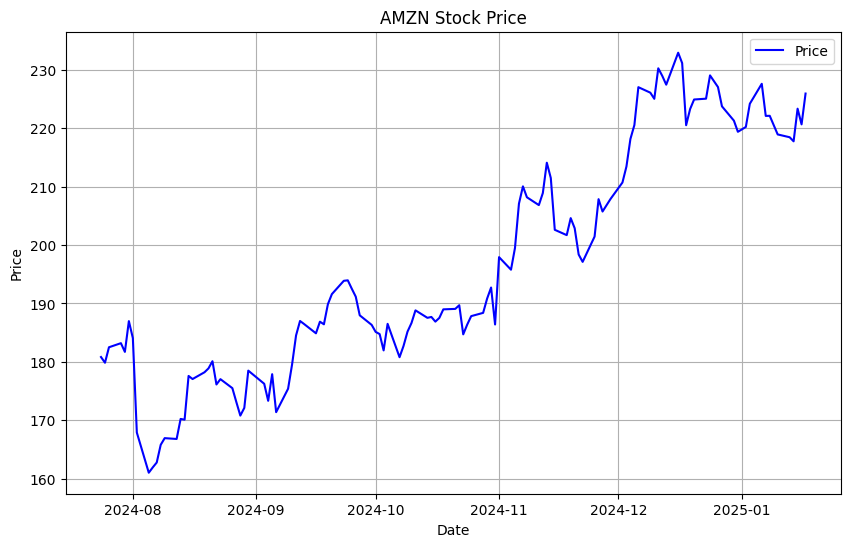

In [4]:
df = calibration.get_historical_prices_df()
# Initialize Graphics class
graphics = Graphics()

# Plot stock chart
graphics.plot_stock_chart(df, ticker)

In [5]:
# Example usage of MonteCarlo
mc = MonteCarlo(S_0=100, K=100, T=1, mu=0.05, sigma=0.2, option_type="C")
option_price_mc = mc.get_option_price()
print(f"Monte Carlo Option Price: {option_price_mc}")

Monte Carlo Option Price: 11.120689913783888


In [6]:
# Example usage of BlackScholes
bs = BlackScholes(r=0.05, S=100, K=100, T=1, sigma=0.2, option_type="C")
option_price = bs.calculate_option_price()
print(f"Black-Scholes Option Price: {option_price}")

Black-Scholes Option Price: 10.450583572185565
